<a href="https://colab.research.google.com/github/rtafurthgarcia/COM763/blob/main/COM_763_Week_3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Loading the dataset

We will directly import the dataset from Github.

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

In [ ]:
# Display the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


## Memory optimization

Pregnancies: Since the maximum value is 17, an int8 (range -128 to 127) would be sufficient instead of int64.

Glucose: The maximum value is 199, which fits well within the range of uint8 (0 to 255).

BloodPressure: The maximum value is 122, so uint8 would work here as well.

SkinThickness: Maximum value is 99, again uint8 is suitable.

Insulin: Maximum value is 846, which exceeds uint8 but fits within uint16 (0 to 65535).

BMI: Since it's a float with a mean of 31.99, you could consider using float32 instead of float64 if precision loss is acceptable.

DiabetesPedigreeFunction: Similar to BMI, float32 could be used for memory optimization.

Age: Maximum age is 81, so uint8 would be sufficient.

Outcome: Since it's binary (0 or 1), uint8 would be sufficient.

In [ ]:
import pandas as pd

# Convert columns to optimized data types
df['Pregnancies'] = df['Pregnancies'].astype('int8')  # int8 for Pregnancies
df['Glucose'] = df['Glucose'].astype('uint8')  # uint8 for Glucose
df['BloodPressure'] = df['BloodPressure'].astype('uint8')  # uint8 for BloodPressure
df['SkinThickness'] = df['SkinThickness'].astype('uint8')  # uint8 for SkinThickness
df['Insulin'] = df['Insulin'].astype('uint16')  # uint16 for Insulin
df['BMI'] = df['BMI'].astype('float32')  # float32 for BMI
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('float32')  # float32 for DiabetesPedigreeFunction
df['Age'] = df['Age'].astype('uint8')  # uint8 for Age
df['Outcome'] = df['Outcome'].astype('uint8')  # uint8 for Outcome (binary)


df = df.convert_dtypes()

In [ ]:
df.dtypes

,0
Pregnancies,Int8
Glucose,UInt8
BloodPressure,UInt8
SkinThickness,UInt8
Insulin,UInt16
BMI,Float32
DiabetesPedigreeFunction,Float32
Age,UInt8
Outcome,UInt8


In [ ]:
# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no null values in this dataset. However you can use an Imputer if you encounter any null values.

In [ ]:
# Using SimpleImputer to fill missing values (if any) with the median for numerical columns
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## Exploratory Data Analysis

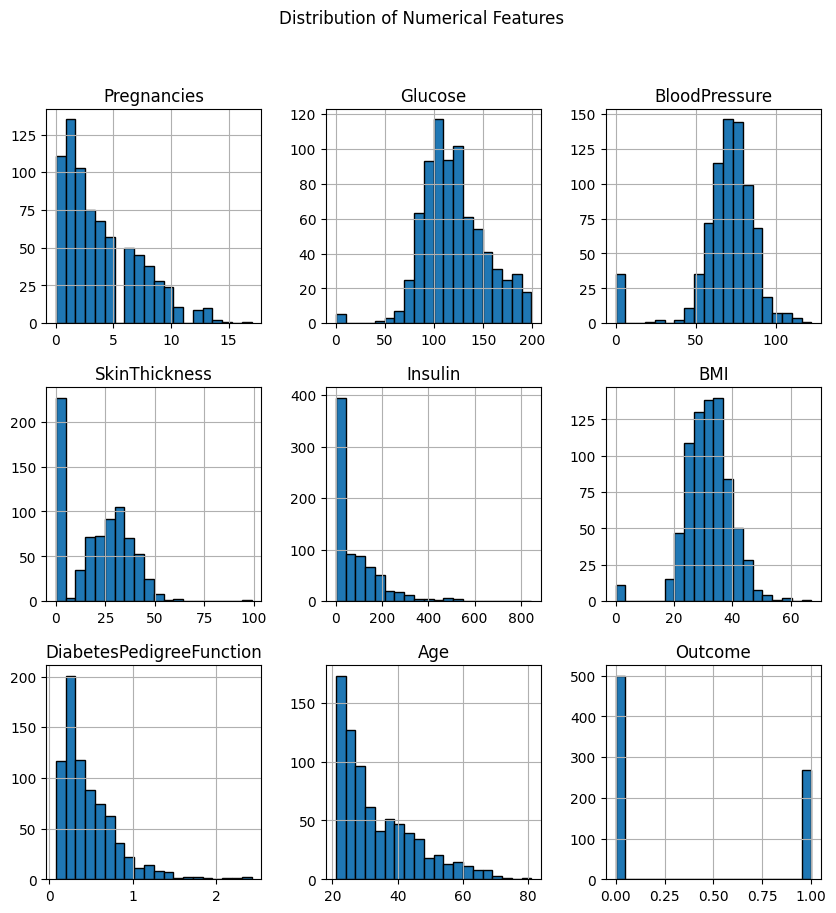

In [ ]:
# Visualizing the distribution of numerical features
df.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

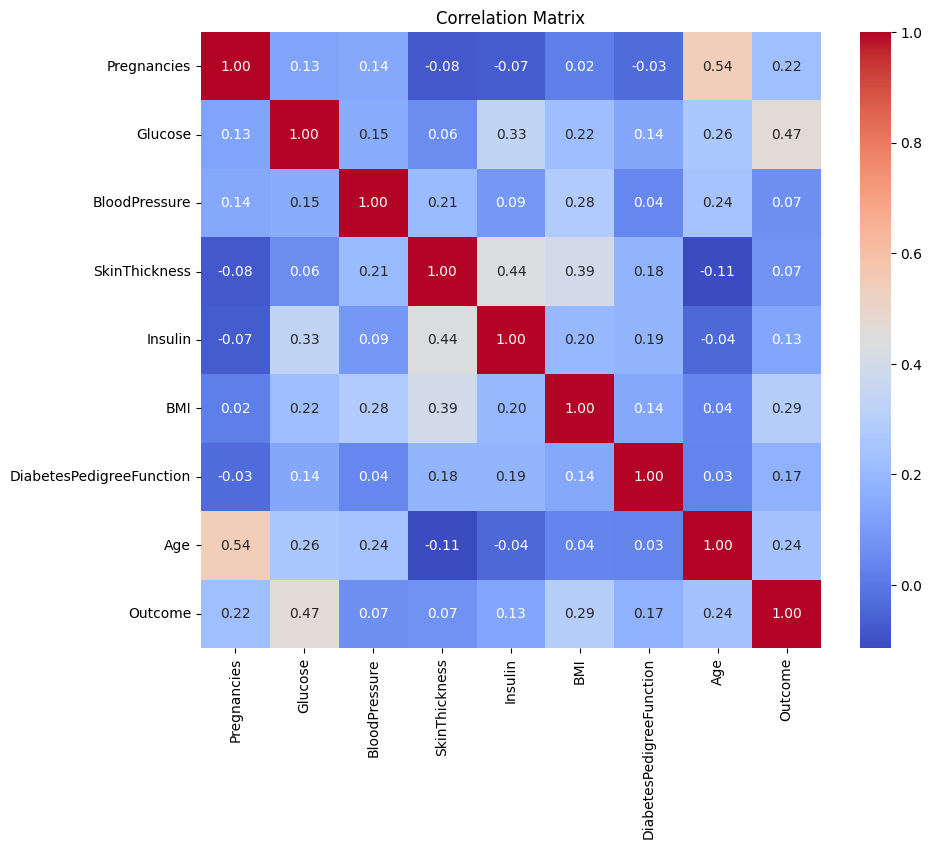

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

##Handling Outliers

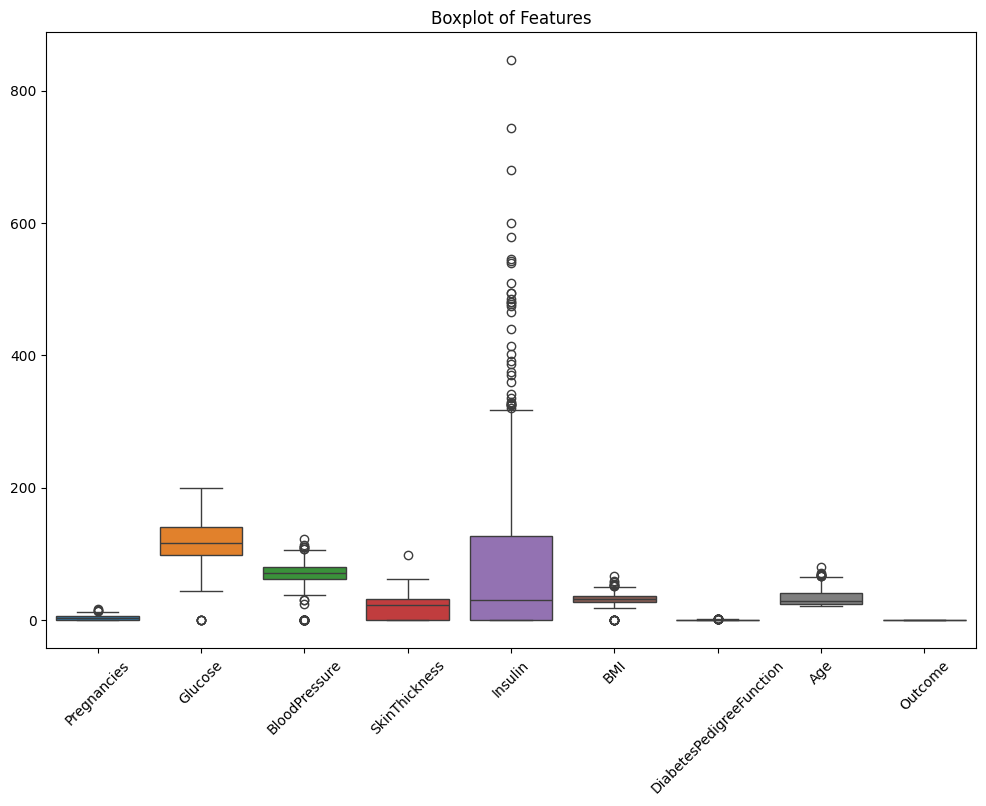

In [ ]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate IQR for each numeric column
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition for each column
outlier_condition = ((df_imputed < (Q1 - 1.5 * IQR)) | (df_imputed > (Q3 + 1.5 * IQR)))

# Keep rows where no outliers are detected
df_no_outliers = df_imputed[~outlier_condition.any(axis=1)]

print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")

Dataset shape after outlier removal: (639, 9)


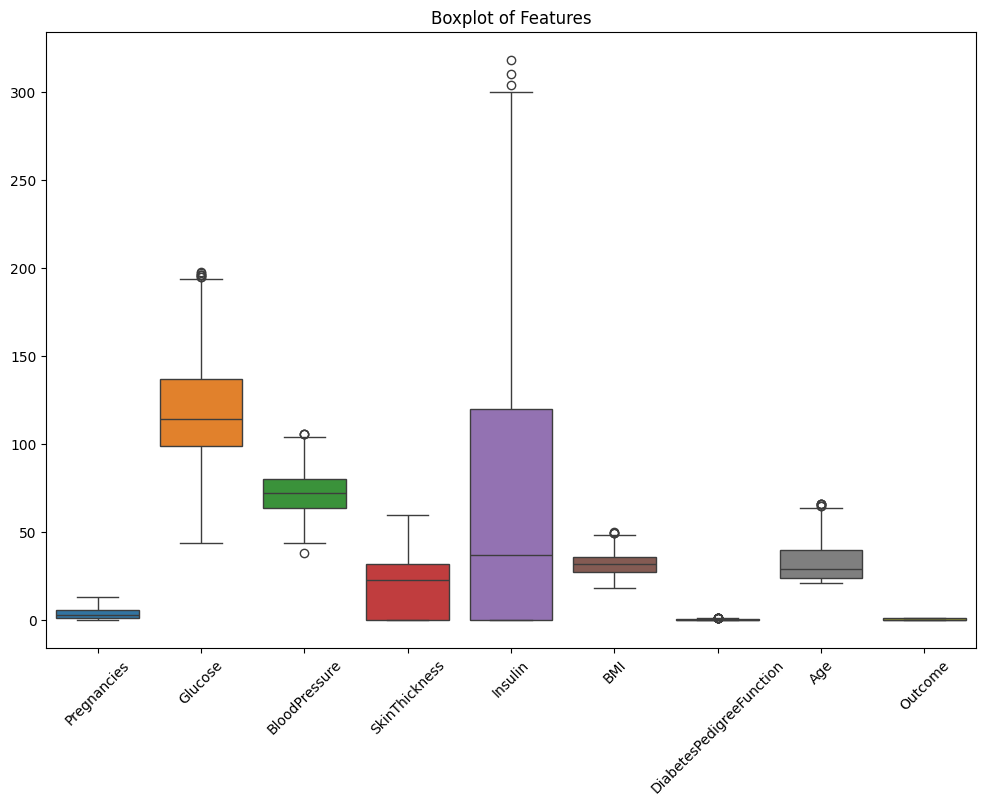

In [ ]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_no_outliers)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

##Feature Engineering

In [ ]:
# First create an explicit copy of the dataframe
df_no_outliers = df_no_outliers.copy()

# Define the categorization functions
def categorize_age(age):
    if age < 21:
        return 'Young'
    elif age < 35:
        return 'Adult'
    else:
        return 'Middle_Aged'

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Add new features using .loc
df_no_outliers.loc[:, 'Age_Category'] = df_no_outliers['Age'].apply(categorize_age)
df_no_outliers.loc[:, 'BMI_Category'] = df_no_outliers['BMI'].apply(categorize_bmi)

# Convert to categorical
df_no_outliers.loc[:, 'Age_Category'] = df_no_outliers['Age_Category'].astype('category')
df_no_outliers.loc[:, 'BMI_Category'] = df_no_outliers['BMI_Category'].astype('category')

In [ ]:
df_no_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,BMI_Category
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Middle_Aged,Obese
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Adult,Overweight
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Adult,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Adult,Overweight
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,Adult,Overweight


##Encoding Categorical Variables

In [ ]:
# Method 2: One-Hot Encoding
df_encoded = pd.get_dummies(df_no_outliers,
                          columns=['Age_Category', 'BMI_Category'],
                          prefix=['Age', 'BMI'])

In [ ]:
df_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Adult,Age_Middle_Aged,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,False,True,False,True,False,False
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,True,False,False,False,True,False
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,True,False,True,False,False,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,True,False,False,False,True,False
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,True,False,False,False,True,False


However, lable encoder is also suitable in this case since these features can be considered as ordinal categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders
le_age = LabelEncoder()
le_bmi = LabelEncoder()

# Apply label encoding
df_no_outliers.loc[:, 'Age_Category_Label'] = le_age.fit_transform(df_no_outliers['Age_Category'])
df_no_outliers.loc[:, 'BMI_Category_Label'] = le_bmi.fit_transform(df_no_outliers['BMI_Category'])

In [ ]:
df_no_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,BMI_Category,Age_Category_Label,BMI_Category_Label
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Middle_Aged,Obese,1,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Adult,Overweight,0,2
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Adult,Normal,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Adult,Overweight,0,2
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,Adult,Overweight,0,2


##Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale (excluding Outcome and one-hot encoded columns)
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a scaler object
scaler = StandardScaler()

# Create a copy of the dataframe to store scaled values
df_scaled = df_encoded.copy()

# Fit and transform the selected numeric columns
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Verify the scaling by showing the head of the dataframe
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Adult,Age_Middle_Aged,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132,1.0,False,True,False,True,False,False
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912,0.0,True,False,False,False,True,False
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594,1.0,True,False,True,False,False,False
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093,0.0,True,False,False,False,True,False
5,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230,0.0,True,False,False,False,True,False


##Box plot for features after scaling

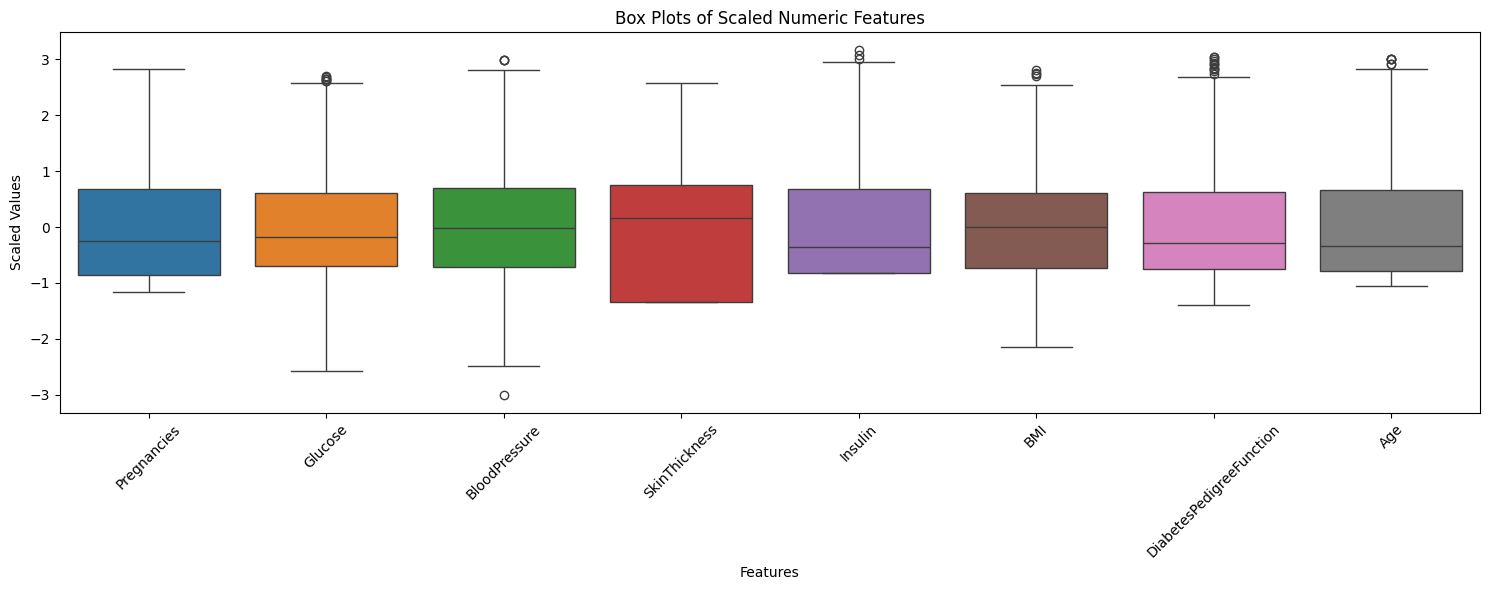

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 6))

# Create box plot using seaborn
sns.boxplot(data=df_scaled[numeric_columns])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Box Plots of Scaled Numeric Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
model = linearregression()

NameError: name 'linearregression' is not defined

In [ ]:
model.fit(df)